In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [40]:
csv_path1 = "../potential_data_sets/1990-2019_annual_GENERATION_state.csv"
csv_path2 = "../potential_data_sets/1990-2018_annual_PRICE_state.csv"

In [41]:
#Reading in the production Data
df1 = pd.read_csv(csv_path1,header=None)
df1 = df1.rename(columns=df1.iloc[1])
df1.columns
df1 = df1[["YEAR","STATE","TYPE OF PRODUCER","ENERGY SOURCE","GENERATION (Megawatthours)"]]
df1 = df1.drop(df1.index[[0,1]])

In [42]:
#df1 IS THE POWER GENERATION DATA SET
df1.head()
df1.dtypes

YEAR                          object
STATE                         object
TYPE OF PRODUCER              object
ENERGY SOURCE                 object
GENERATION (Megawatthours)    object
dtype: object

In [43]:
df1["GENERATION (Megawatthours)"] = df1["GENERATION (Megawatthours)"].apply(lambda x: float(x.split()[0].replace(',', '')))

In [44]:
#Reading in the pricing data for the States
#DF2 IS THE PRICING DATA SET
df2 = pd.read_csv(csv_path2,header=None)
df2 = df2.rename(columns=df2.iloc[1])
df2 = df2.drop(df2.index[[0,1]])
df2.head()

,Year,State,Industry Sector Category,Residential,Commercial,Industrial,Transportation,Other,Total
2,2018,AK,Total Electric Industry,21.94,18.58,17.10,0.00,NaN,19.36
3,2018,AL,Total Electric Industry,12.18,11.24,6.01,0.00,NaN,9.63
4,2018,AR,Total Electric Industry,9.81,7.75,5.64,11.35,NaN,7.78
5,2018,AZ,Total Electric Industry,12.77,10.64,6.55,10.02,NaN,10.85
6,2018,CA,Total Electric Industry,18.84,16.34,13.20,8.64,NaN,16.58


In [45]:
df2 = df2.loc[df2["Industry Sector Category"] == "Total Electric Industry"]


In [46]:
df2 = df2[["State","Year","Total"]]
df2 = df2.rename(columns = {"Total":"Avg Price (cents/kW Hour)"})
df2.head()

,State,Year,Avg Price (cents/kW Hour)
2,AK,2018,19.36
3,AL,2018,9.63
4,AR,2018,7.78
5,AZ,2018,10.85
6,CA,2018,16.58


In [47]:
df2["Avg Price (cents/kW Hour)"] = pd.to_numeric(df2["Avg Price (cents/kW Hour)"])
df2["Year"] = pd.to_numeric(df2["Year"])

In [48]:
df2.dtypes

State                         object
Year                           int64
Avg Price (cents/kW Hour)    float64
dtype: object

In [49]:
#Getting Average Price from 1990 to 2018
price_state_groups = df2.groupby("State")
avg_price_by_state = price_state_groups["Avg Price (cents/kW Hour)"].mean()


In [50]:
#Using .loc to get only the past decade's worth of data instead of bins which 
#makes "categories" dtype and I don't want that
df2 = df2.loc[df2["Year"] >= 2008]


In [51]:
lastDecadePriceStateGroups = df2.groupby("State")
average_state_price = lastDecadePriceStateGroups["Avg Price (cents/kW Hour)"].mean()
average_state_price

State
AK    16.811818
AL     9.202727
AR     7.790000
AZ    10.032727
CA    14.369091
CO     9.504545
CT    17.165455
DC    12.364545
DE    11.357273
FL    10.544545
GA     9.443636
HI    28.465455
IA     7.996364
ID     7.290909
IL     9.124545
IN     8.563636
KS     9.439091
KY     7.584545
LA     7.783636
MA    15.700000
MD    12.146364
ME    12.790909
MI    10.574545
MN     9.176364
MO     8.737273
MS     9.004545
MT     8.390000
NC     8.940000
ND     7.977273
NE     8.290909
NH    15.260909
NJ    13.903636
NM     8.999091
NV     9.269091
NY    15.488182
OH     9.384545
OK     7.794545
OR     8.261818
PA    10.038182
RI    15.186364
SC     9.143636
SD     8.738182
TN     9.101818
TX     9.030000
US    10.120909
UT     7.794545
VA     8.974545
VT    14.010909
WA     7.160000
WI    10.224545
WV     7.827273
WY     7.232727
Name: Avg Price (cents/kW Hour), dtype: float64

In [52]:
#Looking at Total State Energy Data and condensing it down to last decade's worth of data
#Then Group by State and merge the two data frames or whatever
df1.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
2,1990,AK,Total Electric Power Industry,Total,5599506.0
3,1990,AK,Total Electric Power Industry,Coal,510573.0
4,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521.0
5,1990,AK,Total Electric Power Industry,Natural Gas,3466261.0
6,1990,AK,Total Electric Power Industry,Petroleum,497116.0


In [53]:
#Correcting the year data type
df1["YEAR"] = pd.to_numeric(df1["YEAR"])

#Filtering out only the last decade's worth of data, checking on the solar name
last_decade_df = df1.loc[df1["YEAR"] >= 2008]
print(last_decade_df["ENERGY SOURCE"].value_counts())

Total                             3447
Natural Gas                       3148
Petroleum                         2991
Other Biomass                     2301
Coal                              2268
Hydroelectric Conventional        1813
Other                             1798
Wood and Wood Derived Fuels       1534
Wind                              1393
Solar Thermal and Photovoltaic    1183
Other Gases                        806
Nuclear                            782
Pumped Storage                     480
Geothermal                         221
Name: ENERGY SOURCE, dtype: int64


In [54]:
#Filtering out only the solar data
last_decade_solar_df = last_decade_df.loc[(last_decade_df["ENERGY SOURCE"] == "Solar Thermal and Photovoltaic") &
                                         (last_decade_df["TYPE OF PRODUCER"] == "Total Electric Power Industry")]
last_decade_solar_df.head()


,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
29695,2008,AZ,Total Electric Power Industry,Solar Thermal and Photovoltaic,14724.0
29730,2008,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,670481.0
29788,2008,CO,Total Electric Power Industry,Solar Thermal and Photovoltaic,18354.0
29977,2008,HI,Total Electric Power Industry,Solar Thermal and Photovoltaic,18.0
30239,2008,MA,Total Electric Power Industry,Solar Thermal and Photovoltaic,80.0


In [55]:
state_production = last_decade_solar_df.groupby("STATE")
average_state_production = pd.DataFrame(state_production["GENERATION (Megawatthours)"].mean())
average_state_production.sort_values(by="GENERATION (Megawatthours)")

,GENERATION (Megawatthours)
STATE,
SD,1.480250e+03
LA,1.815667e+03
WA,4.212167e+03
KS,5.647600e+03
IA,7.970250e+03
ME,8.172667e+03
DC,8.829000e+03
WI,1.738683e+04
NE,1.951425e+04


In [56]:
#Looking at just california prices and solar production over the last decade

#Cleaning up California solar production and renaming the columns
california_solar_production = last_decade_solar_df.loc[last_decade_solar_df["STATE"]=="CA"]
california_solar_production = california_solar_production.rename(columns={
        "YEAR":"Year",
        "STATE":"State"
        })

In [57]:
#Cleaning up California solar pricing and renaming the columns
california_solar_pricing = df2.loc[df2["State"]=="CA"]


In [58]:
california_last_decade = pd.merge(california_solar_production,california_solar_pricing,on=["Year","State"],how="outer")
california_last_decade = california_last_decade.dropna(how="any")
california_last_decade

,Year,State,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours),Avg Price (cents/kW Hour)
0,2008,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,670481.0,12.49
1,2009,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,647390.0,13.24
2,2010,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,769331.0,13.01
3,2011,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,888829.0,13.05
4,2012,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,1382300.0,13.53
5,2013,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,3813725.0,14.30
6,2014,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,9931815.0,15.15
7,2015,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,14814384.0,15.42
8,2016,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,18806711.0,15.23
9,2017,CA,Total Electric Power Industry,Solar Thermal and Photovoltaic,24352917.0,16.06


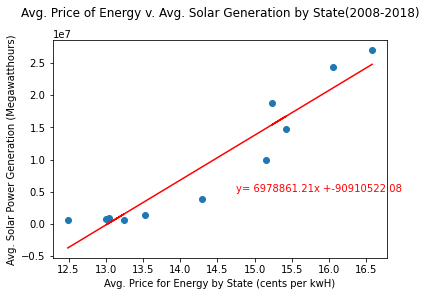

The rvalue is: 0.9480258156201681


In [59]:
#California Scatter Plot for price and production
x_axis_california = california_last_decade["Avg Price (cents/kW Hour)"]
y_axis_california = california_last_decade["GENERATION (Megawatthours)"]

#Linear Regression for the scatter plot model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_california,y_axis_california)
line_eq_c = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_valuesc = slope*x_axis_california + intercept


plt.scatter(x_axis_california,y_axis_california,marker="o")
plt.plot(x_axis_california,regress_valuesc,"r-")
plt.title("Avg. Price of Energy v. Avg. Solar Generation by State(2008-2018)",y=1.08)
plt.xlabel("Avg. Price for Energy by State (cents per kwH)")
plt.ylabel("Avg. Solar Power Generation (Megawatthours)")
plt.annotate(line_eq_c,(14.75,5000000),color="r")
plt.savefig("california_solar_v_price.png")
plt.show()
print(f"The rvalue is: {rvalue}")

In [60]:
#Grouping the States
energy_by_state = last_decade_solar_df.groupby("STATE")

#Looking only at solar numbers
solar_by_state = energy_by_state["GENERATION (Megawatthours)"].mean()
solar_by_state

STATE
AL          2.385350e+05
AR          9.432540e+04
AZ          2.409933e+06
CA          1.094955e+07
CO          4.068848e+05
CT          4.821957e+04
DC          8.829000e+03
DE          4.206389e+04
FL          7.726081e+05
GA          9.112374e+05
HI          7.006233e+04
IA          7.970250e+03
ID          4.004872e+05
IL          3.994964e+04
IN          1.757212e+05
KS          5.647600e+03
KY          2.901300e+04
LA          1.815667e+03
MA          3.699512e+05
MD          1.672441e+05
ME          8.172667e+03
MI          6.696860e+04
MN          3.631541e+05
MO          5.091500e+04
MS          1.835290e+05
MT          2.567933e+04
NC          2.059909e+06
NE          1.951425e+04
NJ          4.919360e+05
NM          6.647454e+05
NV          1.793974e+06
NY          1.600936e+05
OH          6.526280e+04
OK          3.216460e+04
OR          1.731407e+05
PA          4.550083e+04
RI          1.978371e+04
SC          2.089504e+05
SD          1.480250e+03
TN          1.00135

In [61]:
#Make a dataframe of our avg. price and avg. solar generation first to make sure the data is lining up correctly
solar_price_df = pd.DataFrame({
    "Avg. Solar Power Generation (Megawatthours)":solar_by_state,
    "Avg. Price for Energy (cents per kwH)":average_state_price
})

solar_price_df = solar_price_df.dropna(how="any")
solar_price_df

,Avg. Solar Power Generation (Megawatthours),Avg. Price for Energy (cents per kwH)
AL,2.385350e+05,9.202727
AR,9.432540e+04,7.790000
AZ,2.409933e+06,10.032727
CA,1.094955e+07,14.369091
CO,4.068848e+05,9.504545
CT,4.821957e+04,17.165455
DC,8.829000e+03,12.364545
DE,4.206389e+04,11.357273
FL,7.726081e+05,10.544545
GA,9.112374e+05,9.443636


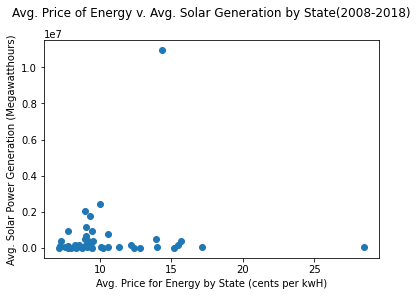

In [62]:
#Making the Scatter plot for state average price by state average solar generation

x_axis1 = solar_price_df["Avg. Price for Energy (cents per kwH)"]
y_axis1 = solar_price_df["Avg. Solar Power Generation (Megawatthours)"]

plt.scatter(x_axis1,y_axis1,marker="o")
plt.title("Avg. Price of Energy v. Avg. Solar Generation by State(2008-2018)",y=1.08)
plt.xlabel("Avg. Price for Energy by State (cents per kwH)")
plt.ylabel("Avg. Solar Power Generation (Megawatthours)")
plt.show()

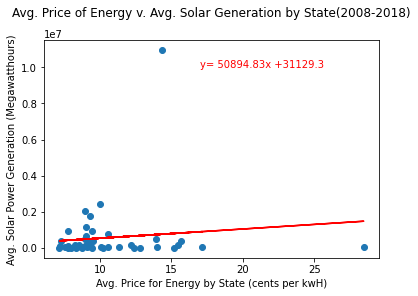

The rvalue is: 0.11387691312065548


In [63]:
#Linear Regression for the scatter plot model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis1,y_axis1)
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values1 = slope*x_axis1 + intercept


plt.scatter(x_axis1,y_axis1,marker="o")
plt.plot(x_axis1,regress_values1,"r-")
plt.title("Avg. Price of Energy v. Avg. Solar Generation by State(2008-2018)",y=1.08)
plt.xlabel("Avg. Price for Energy by State (cents per kwH)")
plt.ylabel("Avg. Solar Power Generation (Megawatthours)")
plt.annotate(line_eq,(17,10000000),color="r")
plt.savefig("avg_energy_v_generation_by_state.png")
plt.show()
print(f"The rvalue is: {rvalue}")

Production lower than -529057.0 and higher than 963331.8 are outliers


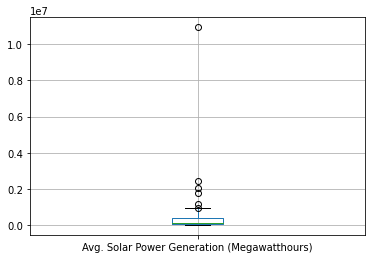

In [64]:
#Looking for outliers
solar_price_df.boxplot(column="Avg. Solar Power Generation (Megawatthours)")

production_quartiles=solar_price_df["Avg. Solar Power Generation (Megawatthours)"].quantile([.25,.5,.75])
production_lowerq = production_quartiles[.25]
production_upperq = production_quartiles[.75]
production_iqr = production_upperq-production_lowerq
production_lower_bound = round(production_lowerq - 1.5*production_iqr,2)
production_upper_bound = round(production_upperq + 1.5*production_iqr,2)
print(f"Production lower than {production_lower_bound} and higher than {production_upper_bound} are outliers")

Prices per kilowatt hour lower than 4.74 and higher than 14.7 are outliers


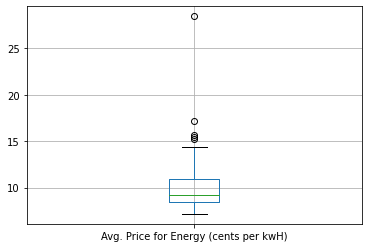

In [65]:
solar_price_df.boxplot(column="Avg. Price for Energy (cents per kwH)")

price_quartiles=solar_price_df["Avg. Price for Energy (cents per kwH)"].quantile([.25,.5,.75])
price_lowerq = price_quartiles[.25]
price_upperq = price_quartiles[.75]
price_iqr = price_upperq-price_lowerq
price_lower_bound = round(price_lowerq - 1.5*price_iqr,2)
price_upper_bound = round(price_upperq + 1.5*price_iqr,2)
print(f"Prices per kilowatt hour lower than {price_lower_bound} and higher than {price_upper_bound} are outliers")


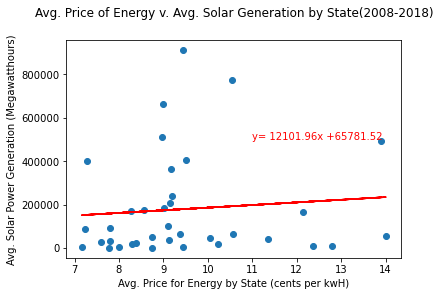

The rvalue is: 0.09123607094265138


In [68]:
#removing the outliers from each dataset
solar_price_df_clean = solar_price_df.loc[solar_price_df["Avg. Price for Energy (cents per kwH)"] < price_upper_bound]
solar_price_df_clean = solar_price_df_clean.loc[solar_price_df_clean["Avg. Solar Power Generation (Megawatthours)"] < production_upper_bound]

#Creating a scatter plot and linear regression without outliers
x_axis2 = solar_price_df_clean["Avg. Price for Energy (cents per kwH)"]
y_axis2 = solar_price_df_clean["Avg. Solar Power Generation (Megawatthours)"] 

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2,y_axis2)
line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
regress_values2 = slope*x_axis2 + intercept


plt.scatter(x_axis2,y_axis2,marker="o")
plt.plot(x_axis2,regress_values2,"r-")
plt.title("Avg. Price of Energy v. Avg. Solar Generation by State(2008-2018)",y=1.08)
plt.xlabel("Avg. Price for Energy by State (cents per kwH)")
plt.ylabel("Avg. Solar Power Generation (Megawatthours)")
plt.annotate(line_eq,(11,500000),color="r")
plt.savefig("avg_energy_v_generation_by_state_no_outliers.png")
plt.show()
print(f"The rvalue is: {rvalue}")